# Creating the Data Set


In [1]:
!pip install --upgrade pip
!pip install --upgrade transformers
!pip install --upgrade git+https://github.com/huggingface/accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-zbv_tbih
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-zbv_tbih
  Resolved https://github.com/huggingface/accelerate to commit 97d2168e5953fe7373a06c69c02c5a00a84d5344
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... do

In [2]:
# importing necessary libraries
import torch, os

In [3]:
# installing transformers dataset
!pip install transformers dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.27
    Uninstalling SQLAlchemy-2.0.27:
      Successfully uninstalled SQLAlchemy-2.0.27
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.51 which is incompatible.


In [4]:
# using the gpu
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
# loading the dataset
from google.colab import files
texts = files.upload()

Saving Corpus.csv to Corpus.csv


In [6]:
# creating pandas dataframe
import pandas as pd
column_names = ["sentenceID", "text", "author", "year", "genre", "source"]
data = pd.read_csv('Corpus.csv', header=None, sep=';', names=column_names, encoding='utf-8', quoting=3, on_bad_lines='skip')
data = data.sample(frac=1, random_state=42)
data.head()

,sentenceID,text,author,year,genre,source
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel


In [7]:
data["century"] = 0
for i in range(len(data)):
    data["century"][i] = int(data["year"][i]/100 + 1)
data.head()

<ipython-input-7-864c72d1317b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["century"][i] = int(data["year"][i]/100 + 1)


,sentenceID,text,author,year,genre,source,century
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus,21
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus,21
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus,21
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel,19


In [9]:
data["labels"] = data["author"].apply(lambda x: 1 if x == "Heinrich Heine" else 0)

In [10]:
data.head()

,sentenceID,text,author,year,genre,source,century,labels
29253,14-9564,Wie ist die Entwicklung weiterhin geplant?,verschieden,2011,verschieden,Leipzig Corpus,21,0
25987,14-6296,Hier sind die höchsten Rohertragsmargen zu erz...,verschieden,2011,verschieden,Leipzig Corpus,21,0
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
28977,14-9288,Während meines Besuchs wurde ein Kälbchen gebo...,verschieden,2011,verschieden,Leipzig Corpus,21,0
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel,19,0


In [13]:
data.century.value_counts()

19    18790
21     9998
18      901
Name: century, dtype: int64

In [11]:
historisch = data["century"] < 20

In [12]:
heine_historisch = data[historisch]

In [14]:
heine_historisch.head()

,sentenceID,text,author,year,genre,source,century,labels
10092,8-3703,Andern Tages wissen sie von diesem sonderbaren...,E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
19061,13-457,""" ""Sie haben recht, mein Herr"", sagte die Lade...",Theodor Storm,1874,Lyrik,Waldwinkel,19,0
19016,13-412,Sie lachte auf,Theodor Storm,1874,Lyrik,Waldwinkel,19,0
1921,3-146,nun kommt mein feins Liebchen auch bald,Heinrich Heine,1827,Lyrik,Buch der Lieder,19,1
8282,8-1893,"Aber oft kam es, daß eine stärker berührte Sai...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0


In [15]:
id2label = {1: "Heinrich Heine", 0: "Nicht-Heine"}
label2id = {"Heinrich Heine": 1, "Nicht-Heine": 0}

In [16]:
heine_historisch.labels.value_counts()

0    13302
1     6389
Name: labels, dtype: int64

# Training the Classifier

In [17]:
# importing BERT tokenizer and sequence classifier
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id)
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [19]:
heine_historisch = heine_historisch.dropna()

In [22]:
# split the data into train, val and test sets
SIZE = heine_historisch.shape[0]

train_texts   = list(heine_historisch.text[:(SIZE//10)*8])
val_texts     = list(heine_historisch.text[(SIZE//10)*8:(SIZE//100)*85])
test_texts    = list(heine_historisch.text[(SIZE//100)*85:])

train_labels  = list(heine_historisch.labels[:(SIZE//10)*8])
val_labels    = list(heine_historisch.labels[(SIZE//10)*8:(SIZE//100)*85])
test_labels   = list(heine_historisch.labels[(SIZE//100)*85:])

In [23]:
len(train_texts), len(val_texts), len(test_texts)

(15752, 908, 3031)

In [25]:
# Is the train data balanced?
heine_historisch[:15752].labels.value_counts()

0    10657
1     5095
Name: labels, dtype: int64

<Axes: ylabel='labels'>

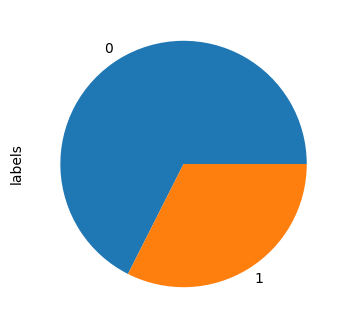

In [26]:
heine_historisch.labels.value_counts().plot(kind="pie", figsize=(4,4))

In [27]:
heine_historisch[:15752].author.value_counts()

E.T.A. Hoffmann    6117
Heinrich Heine     5095
J.W. von Goethe    3683
Theodor Storm       857
Name: author, dtype: int64

<Axes: ylabel='author'>

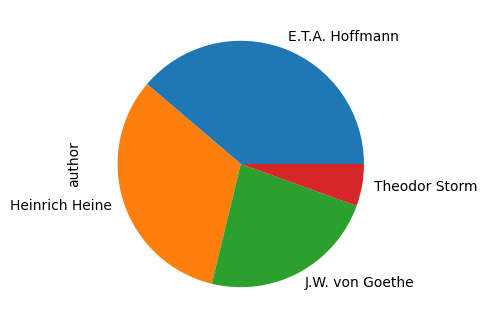

In [28]:
heine_historisch.author.value_counts().plot(kind="pie", figsize=(4,4))

In [29]:
# encode the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [30]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [31]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [32]:
# import trainer class
from transformers import TrainingArguments, Trainer

In [33]:
# define the metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [34]:
# setup of the trainer
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir= './HeinrichT',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
    # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [35]:
# Initializing the trainer class
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
    # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics= compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:437: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


In [36]:
# Train/fine-tune the BERT classifier
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,0.629700,0.611373,0.657489,0.399735,0.828556,0.501603
100,0.610200,0.588156,0.658590,0.403174,0.828918,0.503205
150,0.616400,0.571865,0.656388,0.396277,0.328194,0.500000
200,0.536400,0.511506,0.747797,0.657090,0.778632,0.650576
250,0.482600,0.469286,0.806167,0.779839,0.788299,0.773694
300,0.450600,0.550539,0.776432,0.703212,0.816699,0.688425
350,0.423100,0.441597,0.824890,0.803592,0.807593,0.800174
400,0.463000,0.377262,0.833700,0.817701,0.814569,0.821395
450,0.405100,0.438689,0.798458,0.788503,0.783676,0.809822
500,0.414200,0.408924,0.816079,0.772610,0.833430,0.752990


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=4925, training_loss=0.19716233488266843, metrics={'train_runtime': 3184.7778, 'train_samples_per_second': 24.73, 'train_steps_per_second': 1.546, 'total_flos': 1.79299289785704e+16, 'train_loss': 0.19716233488266843, 'epoch': 5.0})

# Testing the Model

In [37]:
# Return a table with the scores
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.163547,0.937976,0.928948,0.930142,0.927784
val,0.326859,0.872247,0.857056,0.860702,0.853812
test,0.324274,0.871330,0.850601,0.857340,0.844909


In [47]:
# loading the test dataset
test = files.upload()

Saving TestData.csv to TestData.csv


In [48]:
# creating pandas dataframe
import pandas as pd
col_names = ["sentenceID", "text", "author", "year", "genre", "source"]
test_data = pd.read_csv('TestData.csv', header=None, sep=';', names=col_names, encoding='utf-8', quoting=3, on_bad_lines='skip')
test_data["century"] = 0
for i in range(len(test_data)):
    test_data["century"][i] = int(test_data["year"][i]/100 + 1)
test_data["labels"] = test_data["author"].apply(lambda x: 1 if x == "Heinrich Heine" else 0)
test_data.head()

<ipython-input-48-52f055999163>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["century"][i] = int(test_data["year"][i]/100 + 1)


,sentenceID,text,author,year,genre,source,century,labels
0,0-0,"In einer Kutsche lang und schwer, Durch Hügel,...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
1,0-1,"Die Räder knarren, Leder quietscht, Ein Hauch ...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
2,0-2,"Die Sonne neigt sich, malerisch rot, Über Hüge...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
3,0-3,"Im Kutschenschlag ein sanfter Ton, Vom Rausche...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0
4,0-4,"Durch Orte klein, durch Wälder tief, Zieht sti...",ChatGPT,2023,Lyrik,Gedicht 1 (lange Kutschenfahrt Richtung Düssel...,21,0


In [49]:
# define predict function to test the classifier on test data
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    return model.config.id2label[probs.argmax().item()]

In [50]:
# predict the label of the sentences
predictions2 = []

for i in range(len(test_data["text"])):
    prediction2 = predict(test_data["text"][i])
    predictions2.append(prediction2)

In [51]:
# the label should be Nicht-Heine (0) since none of them were written by Heinrich Heine
from collections import Counter

counter2 = Counter(predictions2)
most_frequent2 = counter2.most_common(2)

print(most_frequent2)

[('Heinrich Heine', 127), ('Nicht-Heine', 67)]


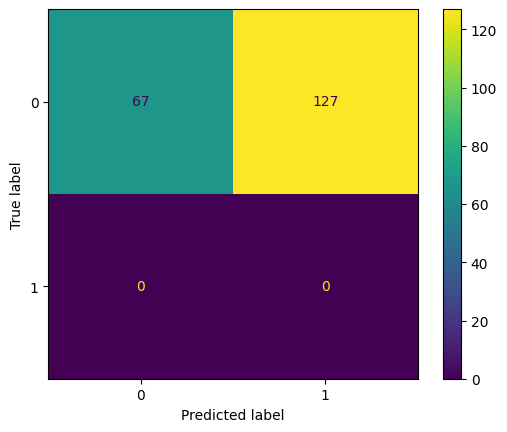

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [int(numeric_string) for numeric_string in test_data["labels"].array]
y_pred = [1 if i == "Heinrich Heine" else 0 for i in predictions2]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
disp.plot()


# Saving the Model

In [53]:
# saving the fine tuned model & tokenizer
model_path = "HeinrichT_classifier_historisch"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('HeinrichT_classifier_historisch/tokenizer_config.json',
 'HeinrichT_classifier_historisch/special_tokens_map.json',
 'HeinrichT_classifier_historisch/vocab.txt',
 'HeinrichT_classifier_historisch/added_tokens.json',
 'HeinrichT_classifier_historisch/tokenizer.json')

In [54]:
# loading the model
model_path = "HeinrichT_classifier_historisch"
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [61]:
heine_texts = []

counter = 0
for i in range(len(test_texts)):
  if counter < 10:
    if test_labels[i] == 1:
      heine_texts.append(test_texts[i])
      counter += 1
  else:
    break

In [62]:
chatGPT_texts = [t for t in test_data["text"][:10]]

print("Heine: ")
for x in heine_texts:
  print("\t" + x)
print("-----")
print("Chat GPT: ")
for y in chatGPT_texts:
  print("\t" + y)

Heine: 
	Nicht mehr mit Liebe blickt nach dir, Dort, der schreckliche Ares
	Es ist eine Art des Ansichhaltens, wie es furchtbaren Ausbrüchen vorherzugehen pflegt
	Glaub nicht, daß ich mich erschieße, Wie schlimm auch die Sachen stehn
	Als ich eine Stunde später an demselben Hause vorbeiging, stand die Holde am Fenster, und wie sie die Glockenblümchen auf meiner Mütze gewahrte, wurde sie blutrot und stürzte zurück
	Wie schön war der Name Arndts, ehe er auf höheren Geheiß jenes schäbige Büchlein geschrieben, worin er wie ein Hund wedelt und hündisch, wie ein wendischer Hund, die Sonne des Julius anbellt
	(Ich habe hier einige Stücke ausscheiden müssen, die allzusehr jenem Moderantismus huldigten, der in dieser Zeit der Reaktion nicht mehr rühmlich und passend ist
	Hier ist der Garten, wo ich gerne spielte,                        Hier blühn die Blumen, die mir freundlich nickten, Hier singt der Zeisig, der mich morgens grüßt',  Doch sprich, mein Lieb, ich sehe nicht die Myrte, Wo sie eins

In [63]:
# Heine-Scores von Heine-Sätzen
for h in heine_texts:
  print(nlp(h))

[{'label': 'Nicht-Heine', 'score': 0.9354214668273926}]
[{'label': 'Nicht-Heine', 'score': 0.9530898332595825}]
[{'label': 'Heinrich Heine', 'score': 0.9534176588058472}]
[{'label': 'Nicht-Heine', 'score': 0.6749284863471985}]
[{'label': 'Nicht-Heine', 'score': 0.7190507054328918}]
[{'label': 'Heinrich Heine', 'score': 0.9875708818435669}]
[{'label': 'Heinrich Heine', 'score': 0.9715245962142944}]
[{'label': 'Heinrich Heine', 'score': 0.8337725400924683}]
[{'label': 'Heinrich Heine', 'score': 0.8752225041389465}]
[{'label': 'Heinrich Heine', 'score': 0.9655309319496155}]


In [64]:
for g in chatGPT_texts:
  print(nlp(g))

[{'label': 'Heinrich Heine', 'score': 0.9726644158363342}]
[{'label': 'Heinrich Heine', 'score': 0.9513508081436157}]
[{'label': 'Heinrich Heine', 'score': 0.7481991052627563}]
[{'label': 'Heinrich Heine', 'score': 0.9633936882019043}]
[{'label': 'Heinrich Heine', 'score': 0.9746848940849304}]
[{'label': 'Heinrich Heine', 'score': 0.9706435203552246}]
[{'label': 'Heinrich Heine', 'score': 0.8066009283065796}]
[{'label': 'Heinrich Heine', 'score': 0.9774686098098755}]
[{'label': 'Heinrich Heine', 'score': 0.753878653049469}]
[{'label': 'Nicht-Heine', 'score': 0.9888157844543457}]
